In [3]:
import pandas as pd
import re

In [4]:
# import the csv of all chats in the libraryh3lp system
df = pd.read_csv('all_chats.csv')

In [5]:
# note how there are about 60 records that contain no text
# which will need deleting
df.count()

id          6511
guest       6511
protocol    6511
queue       6511
profile     6511
started     6511
wait        6171
duration    6165
operator    6171
ip          6490
referrer    6457
text        6452
dtype: int64

In [6]:
# anonymize for librarian and patron
df_simple = df.drop(columns=['id', 'profile', 'ip', 'guest', 'protocol', 'queue', 'operator', 'referrer', 'wait'])

In [7]:
# text looks like this
df_simple['text'].iloc[100]

'04:59AM 21wr6xn91mpkat@web.libraryh3lp.com: How to search for peer reviewed journals\r\n04:59AM cs-aluna@libraryh3lp.com/cjjv401qjlm5kj: Welcome to the Library chat. My name is Lana.\r\n04:59AM cs-aluna@libraryh3lp.com/cjjv401qjlm5kj: Let me take a look and see what I can recommend. \r\n05:01AM cs-aluna@libraryh3lp.com/cjjv401qjlm5kj: For peer reviewed journal articles  I would suggest starting a search using the Summon search box on this page:  <a href="https://libguides.lr.edu/rudisilllibrary">https://libguides.lr.edu/rudisilllibrary</a>\r\n05:02AM cs-aluna@libraryh3lp.com/cjjv401qjlm5kj: Then click on more search options. On the new page on the leftside there is a limit to section. Click on Scholarly materials, including peer-reviewed  box. \r\n05:02AM cs-aluna@libraryh3lp.com/cjjv401qjlm5kj: Then enter your search terms and click search.\r\n05:02AM 21wr6xn91mpkat@web.libraryh3lp.com: and that will be peer reviewed journals or peer reviewed everything? \r\n05:03AM 21wr6xn91mpkat@we

In [8]:
# the same printed pretty
print(df_simple['text'].iloc[100])

04:59AM 21wr6xn91mpkat@web.libraryh3lp.com: How to search for peer reviewed journals
04:59AM cs-aluna@libraryh3lp.com/cjjv401qjlm5kj: Welcome to the Library chat. My name is Lana.
04:59AM cs-aluna@libraryh3lp.com/cjjv401qjlm5kj: Let me take a look and see what I can recommend. 
05:01AM cs-aluna@libraryh3lp.com/cjjv401qjlm5kj: For peer reviewed journal articles  I would suggest starting a search using the Summon search box on this page:  <a href="https://libguides.lr.edu/rudisilllibrary">https://libguides.lr.edu/rudisilllibrary</a>
05:02AM cs-aluna@libraryh3lp.com/cjjv401qjlm5kj: Then click on more search options. On the new page on the leftside there is a limit to section. Click on Scholarly materials, including peer-reviewed  box. 
05:02AM cs-aluna@libraryh3lp.com/cjjv401qjlm5kj: Then enter your search terms and click search.
05:02AM 21wr6xn91mpkat@web.libraryh3lp.com: and that will be peer reviewed journals or peer reviewed everything? 
05:03AM 21wr6xn91mpkat@web.libraryh3lp.com: sor

In [9]:
# need to remove all non-alpha characters, as well as
# urls and tags, and the final system message to get to the 
# unique message text. the following need to be turned into
# a function but they all remove one thing or another from the text cells

In [10]:
df_simple['text'] = df_simple['text'].str.replace('System message: guest navigated away from chat', '') # remove msg
df_simple['text'] = df_simple['text'].str.replace(r"\d\d:\d\d[A-Z]M[^:]*:", '', regex=True) #remove time/ids
df_simple['text'] = df_simple['text'].str.replace(r"<.*?>", '', regex=True) #remove tags
df_simple['text'] = df_simple['text'].apply(lambda x: re.split('https?:\/\/.*', str(x))[0]) #remove urls
df_simple['text'] = df_simple['text'].str.lower() #lowercase 
df_simple['text'] = df_simple['text'].str.replace(r"[^a-zA-Z]", " ", regex=True) # remove punctuation marks, replace with space

In [11]:
# after this each cell looks like this
print(df_simple['text'].iloc[200])

 i am trying to watch a pbs video but it says that i have to pay for it  is there a way around that    hello  my name is alexandria  welcome to the library chat service    i believe i chatted earlier with your instructor about this     is this for lives well lived     yes   unfortunately  pbs is no longer making that available through their general website    the instructor said they might be able to provide access to students via a private account  and they were going to contact collections about getting a dvd    i presume they will contact the class when they have a solution    okay thank you    you re welcome  can i help you with anything else right now    i am good for now  thank you    have a good one  and thanks for using our library chat service    have a good day    you too        


In [12]:
# now bring in NLTK lib for language cleaning
# code either taken or adapted from https://github.com/lisanka93/text_analysis_python_101/blob/master/Railroad_incidents_USA2019.ipynb
# via article file:///C:/Users/Craig.Varley/Zotero/storage/CTS2DNZC/nlp-101-%E2%85%94-linear-models-for-text-classification-8ced8199c2a8.html

In [13]:
# different ways to stem and lemmatize all the words
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

In [14]:
# stop words. all commonfirst turn the txt file into a list
stop_words_file = 'stopwordlist.txt'
stop_words_list = []
# open stopword file and split with commas to new list
# with is a try/fail word that allows for error
with open(stop_words_file, 'r') as f:
    for line in f:
        stop_words_list.extend(line.split())
# preview list        
stop_words_list[0:10]

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after']

In [15]:
# split all strings in chats before function to
# cut stop words, stem, or lemmatize
df_simple['text'] = df_simple['text'].str.split()
df_simple['text'].head()

0    [can, community, members, public, use, the, li...
1    [what, are, your, hours, today, hi, rudisill, ...
2                       [thank, you, you, re, welcome]
3    [is, the, library, open, tomorrow, welcome, to...
4    [hi, i, was, wondering, if, i, could, get, a, ...
Name: text, dtype: object

In [16]:
df_simple.dtypes

started     object
duration    object
text        object
dtype: object

In [17]:
# function from above urls adapted due to the preprocess lines above
def preprocess(text):

    cleaned_words = []
    words = text
    # remove stopwords
    for word in words:
        if word not in stop_words_list:
            cleaned_words.append(word)
            
# stem or lemmatise words - this uses PorterStemmer()
    
    lemmatizer = PorterStemmer()
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [18]:
df_simple['text'] = df_simple['text'].apply(preprocess)

In [19]:
df_simple.head()

,started,duration,text
0,2023-06-25 11:11:36,00:03:37,commun member public librari space lenoir rhyn...
1,2023-06-20 12:29:27,00:00:19,hour today rudisil librari open pm today june
2,2023-06-18 21:29:46,00:00:01,
3,2023-06-18 21:11:35,00:03:59,librari open tomorrow librari chat servic jon ...
4,2023-06-16 12:04:16,00:03:21,wonder copi articl bank relat therapi trauma j...


In [20]:
# topic modeling basics from
# https://ourcodingclub.github.io/tutorials/topic-modelling-python/
# THIS USES THE ENTIRE DATASET THEN FITS IT TO THE MODEL TRAINED ON THAT DATASET WHICH IS NOT GOOD PRACTICE DUE TO THE
# THREAT OF OVERFITTING. # BELOW THIS IS A SPLIT TEST/TRAIN VERSION

###### 1. TRAIN AND FIT ON THE SAME MODEL -->


# uses LDA model
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
# max_df 0.9 is remove any word in 90%+ of tweets. min_df is minimum occurence of 25.
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df_simple['text']).toarray()

# tf_feature_names tells us what word each column in the matrix represents
tf_feature_names = vectorizer.get_feature_names_out()

In [21]:
print(tf_feature_names)

['abstract' 'aca' 'academ' 'accept' 'access' 'account' 'act' 'activ'
 'actual' 'ad' 'add' 'addit' 'address' 'adjunct' 'administr' 'adolesc'
 'adult' 'advanc' 'advis' 'affect' 'afraid' 'afternoon' 'age' 'ago' 'ah'
 'ahead' 'alex' 'alexa' 'alli' 'allow' 'alphabet' 'alright' 'alumni'
 'amelia' 'american' 'amp' 'analysi' 'ann' 'answer' 'anymor' 'apa'
 'apolog' 'appalachian' 'appear' 'appli' 'appoint' 'approach' 'archiv'
 'area' 'aren' 'articl' 'ash' 'ashevil' 'ask' 'assess' 'assign' 'assist'
 'associ' 'assum' 'attach' 'attempt' 'attend' 'author' 'automat' 'awesom'
 'back' 'bad' 'bar' 'barcod' 'base' 'basic' 'begin' 'behavior' 'bet' 'big'
 'bit' 'book' 'bookstor' 'borrow' 'box' 'break' 'bring' 'broad' 'brows'
 'browser' 'build' 'burl' 'busi' 'button' 'bye' 'cach' 'call' 'campu'
 'canva' 'card' 'care' 'carl' 'carolina' 'carri' 'case' 'catalog'
 'catawba' 'categori' 'center' 'central' 'chanc' 'chang' 'chapter' 'charl'
 'charlott' 'chat' 'check' 'child' 'children' 'choos' 'christian' 'chrome'


In [22]:
len(tf_feature_names)

731

In [23]:
# applies the actual LDA model
from sklearn.decomposition import LatentDirichletAllocation

# change this to fit as needed
number_of_topics = 5

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [24]:
model.fit(tf)

LatentDirichletAllocation(n_components=5, random_state=0)

In [25]:
# function to apply model to 
# what this does: takes the LDA model, topics in each topic, number of topic words per topic, then creates a dataframe
# to display
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [26]:
no_top_words = 5 #number of words in each topic 
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,librari,2641.5,articl,2817.8,book,1428.6,access,1719.7,password,2071.8
1,chat,988.7,search,2740.9,check,1157.8,librari,1290.5,lr,1539.1
2,servic,775.4,find,1732.6,email,950.0,databas,954.8,id,1321.2
3,open,633.6,journal,1357.0,librari,634.9,campu,718.3,campu,1184.9
4,check,532.5,databas,1080.4,ll,607.3,log,684.8,usernam,1084.0


In [27]:
# not bad for a first try!
# topic 0: hours / topic 1: db access and retrieval / topic 2: physical book, ill, catalog topic 3: off-campus
# access? / topic 4: login problems 

#how to evaluate an LDA model? can use COHERENCE. the function below from https://stackoverflow.com/a/75248956
# does this with the model and the df column as args. this function takes scikitlearn LDA format
# and converts to gensim library format to evaluate the coherece of the model. 

# what is COHERENCE? from https://stackoverflow.com/q/52102961
# Topic Coherence is a useful metric for measuring the human interpretability of a given LDA topic model. 
# Gensim's CoherenceModel allows Topic Coherence to be calculated for a given LDA model (several variants are included).

# a better description of the coherence pipline: https://towardsdatascience.com/understanding-topic-coherence-measures-4aa41339634c


from gensim.models import CoherenceModel
import gensim.corpora as corpora

def get_Cv(model, df_columnm):
  topics = model.components_

  n_top_words = 20
  texts = [[word for word in doc.split()] for doc in df_columnm]

  # create the dictionary
  dictionary = corpora.Dictionary(texts)
  # Create a gensim dictionary from the word count matrix

  # Create a gensim corpus from the word count matrix
  corpus = [dictionary.doc2bow(text) for text in texts]

  feature_names = [dictionary[i] for i in range(len(dictionary))]

  # Get the top words for each topic from the components_ attribute
  top_words = []
  for topic in topics:
      top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

  coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
  coherence = coherence_model.get_coherence()
  return coherence

In [28]:
print(get_Cv(model, df_simple['text']))

0.5182804286186614


In [29]:
###### 2. SPLIT INTO TRAIN AND TEST THEN APPLY THE SAME.

# random split function from https://stackoverflow.com/questions/63022043/how-to-split-datatable-dataframe-into-train-and-test-dataset-in-python
from sklearn.model_selection import train_test_split
# 20% split of tokenized and lemmatized text column
train, test = train_test_split(df_simple, test_size=0.2, random_state=42)

In [30]:
train.count()

started     5208
duration    4941
text        5208
dtype: int64

In [31]:
test.count()

started     1303
duration    1224
text        1303
dtype: int64

In [32]:
# so do all the above things to the train sert to make it ready for LDA then evaluation


# the vectorizer object will be used to transform text to vector form
# max_df 0.9 is remove any word in 90%+ of tweets. min_df is minimum occurence of 25.
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf_train = vectorizer.fit_transform(train['text']).toarray()

# tf_feature_names tells us what word each column in the matrix represents
tf_train_feature_names = vectorizer.get_feature_names_out()
print(len(tf_train_feature_names))

630


In [33]:
# applies the actual LDA model to the training set
# change this to fit as needed
number_of_topics = 5
model_train = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model_train.fit(tf_train)

LatentDirichletAllocation(n_components=5, random_state=0)

In [34]:
display_topics(model_train, tf_train_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,access,772.6,librari,2178.9,access,681.8,articl,2425.6,password,1863.4
1,librari,566.0,book,1128.3,email,603.4,search,2238.8,lr,1217.2
2,campu,389.6,check,862.0,librari,544.0,find,1441.0,id,1064.2
3,link,347.7,chat,589.3,log,450.9,journal,1056.9,campu,983.5
4,onlin,274.2,servic,514.9,work,415.1,databas,1052.5,usernam,874.0


In [35]:
# tests coherence using the above function. note the model was LDA, the column is strictly the train split of 80%
get_Cv(model_train, train['text'])

0.5672569212793231

In [36]:
len(train['text'])

5208

In [37]:
# a much lower number than the original. 
# what parameters can we change to improve the score? number of topics (components).# 
# loop from min to max topics then test coherence for each, then display results

def loop_LDA_topics(training_data, training_text, topic_count_min, topic_count_max):
    
    from matplotlib import pyplot as plt
    
    n = topic_count_min
    coherence = {}

    
    while n <= topic_count_max: 
        # 1. fit the model and  as needed
        model_train_func = LatentDirichletAllocation(n_components=n, random_state=0)
        model_train_func.fit(training_data)
        
        # 2. convert to gensim and print coherence
        #print(n, " topics has a coherence of ", get_Cv(model_train_func, training_text))
        
        # 3. add results to dictionary
        coherence[n] = get_Cv(model_train_func, training_text)
        
        # increment
        n += 1
        
    #dictionary to dataframe
    print(coherence)
    df_train_coherence = pd.DataFrame.from_dict(coherence, orient='index', columns=['coherence'])
    print(df_train_coherence)
    # now graph
    df_train_coherence.plot(kind='line', y='coherence', color='red', use_index=True)
    plt.title('Coherence of Topic Models')
    plt.show()

{4: 0.560778088136104, 5: 0.5672569212793231, 6: 0.5416373483564898, 7: 0.5384501748007847, 8: 0.5419466106368279, 9: 0.542641503492991, 10: 0.5437222004505542, 11: 0.5559222849328951, 12: 0.5387556964573875, 13: 0.5372384442916377, 14: 0.5413754491271356, 15: 0.5311078380892471, 16: 0.5398200761336034, 17: 0.5275146262591159, 18: 0.5386290029847598, 19: 0.5319367275097575, 20: 0.5396974031134232}
    coherence
4    0.560778
5    0.567257
6    0.541637
7    0.538450
8    0.541947
9    0.542642
10   0.543722
11   0.555922
12   0.538756
13   0.537238
14   0.541375
15   0.531108
16   0.539820
17   0.527515
18   0.538629
19   0.531937
20   0.539697


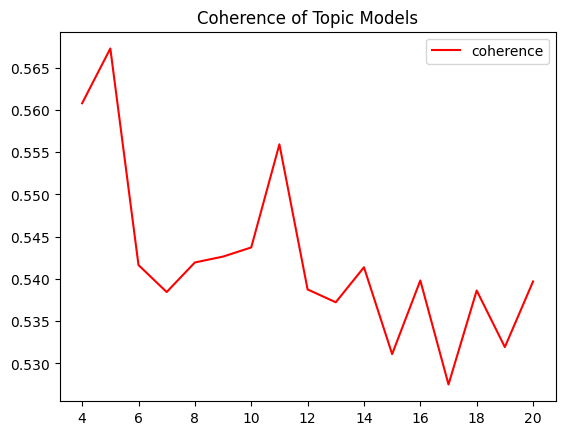

In [38]:
# function with min 4-20 topics
loop_LDA_topics(tf_train, train['text'], 4, 20)

In [39]:
# this suggests 5, maybe 11, are the best number of topics for an LDA analysis.